### **Problem Statement**

XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels & regions, uncover seasonal trends & outliners, and align performance against budget. Use these insights to optimisze pricing, promotions and market expansion for sustainablity growth and reduced concentration risk.


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel('D:/DATA ANALYSIS/Sales Analysis EDA/Regional Sales Dataset.xlsx', sheet_name=None)
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [3]:
# Assign dataFrames to each sheets

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_regions = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [4]:
print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_customers.shape))
print("df_products shape: ", (df_products.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_regions shape: ", (df_state_regions.shape))
print("df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_regions shape:  (49, 3)
df_budgets shape:  (30, 2)


In [5]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_regions.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [11]:
#snice the columns names are wrong therfore new header

new_header = df_state_regions.iloc[0] #Selects the first row of the DataFrame.
df_state_regions.columns = new_header #Assigns the values from the first row (new_header) as the new column headers for the DataFrame.
df_state_regions = df_state_regions[1:].reset_index(drop = True) # Drops the first row (which is now redundant because it's used as headers).
#Resets the index of the DataFrame (so it starts from 0 again), and drop=True avoids adding the old index as a new column.

df_state_regions.head()


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
# Null value check

df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_state_regions.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [14]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

***Data Cleaning & Wrangling***

1. Merging the tables 

In [16]:
#Merge With Customer

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
    )


In [17]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [18]:
#Merge with Products

df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)


In [19]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [20]:
#Merge with Regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
    
)

In [21]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [22]:
print("df columns:", df.columns.tolist())
print("df_state_regions columns:", df_state_regions.columns.tolist())


df columns: ['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone']
df_state_regions columns: ['State Code', 'State', 'Region']


In [23]:
df = df.merge(
    df_state_regions[['State Code', 'Region']],
    how='left',
    left_on='state_code',
    right_on='State Code'
)


In [24]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [25]:
df = df.merge(
    df_budgets,
    how='left',
    left_on='Product Name',
    right_on='Product Name'
)

In [26]:
df.head(0)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets


In [27]:
df.to_csv('file.csv')

In [28]:
# Customer Index
#Index
#id
#State Code

# CLEAN UP REDUNDANT COLUMNS

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors = 'ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [29]:
#  Covert all columns to lower case for consistency and easy excess

df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [30]:
# Keep the Import Columns & Delete the Columns That Won;t Be needed

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer_names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state ',
    'region',
    'latitute',
    'longitute',
    '2017 budgets'
]

In [31]:
print(cols_to_keep)

['ordernumber', 'orderdate', 'customer_names', 'channel', 'product name', 'order quantity', 'unit price', 'line total', 'total unit cost', 'state_code', 'county', 'state ', 'region', 'latitute', 'longitute', '2017 budgets']


In [32]:
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [33]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer_names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state ',
    'region',
    'latitute',
    'longitute',
    '2017 budgets'
]

In [34]:
print(cols_to_keep)

['ordernumber', 'orderdate', 'customer_names', 'channel', 'product name', 'order quantity', 'unit price', 'line total', 'total unit cost', 'state_code', 'county', 'state ', 'region', 'latitute', 'longitute', '2017 budgets']


In [35]:
import pandas as pd

df = pd.read_csv('file.csv') 

In [36]:
print(df.columns.tolist())

['Unnamed: 0', 'OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'State Code', 'Region', '2017 Budgets']


In [37]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces


In [38]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer_names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state',
    'region',
    'latitute',
    'longitute',
    '2017 budgets'
]


In [39]:
missing = [col for col in cols_to_keep if col not in df.columns]
if missing:
    print("Missing columns:", missing)


Missing columns: ['ordernumber', 'orderdate', 'customer_names', 'channel', 'product name', 'order quantity', 'unit price', 'line total', 'total unit cost', 'region', 'latitute', 'longitute', '2017 budgets']


In [40]:
print(df.columns.tolist())


['Unnamed: 0', 'OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'State Code', 'Region', '2017 Budgets']


In [41]:
cols_to_keep = [
    'order number',
    'order date',
    'customer_names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state',
    'county',
    'region',
    'latitute',
    'longitute',
    '2017 budgets'
]


In [42]:

print(df.columns.tolist())


['Unnamed: 0', 'OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'State Code', 'Region', '2017 Budgets']


In [43]:
print(df.columns.tolist())


['Unnamed: 0', 'OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Price', 'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone', 'State Code', 'Region', '2017 Budgets']


In [44]:
#  Covert all columns to lower case for consistency and easy excess

df.columns = df.columns.str.lower()

df.columns.values

array(['unnamed: 0', 'ordernumber', 'orderdate', 'customer name index',
       'channel', 'currency code', 'warehouse code',
       'delivery region index', 'product description index',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'customer index', 'customer names', 'index', 'product name', 'id',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone',
       'state code', 'region', '2017 budgets'], dtype=object)

In [45]:
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code','unnamed: 0', 'currency code','warehouse code', 'delivery region inde',
                'product description index', 'name', 'state_code', 'type', 'area_code', 'population', 'households', 'median_income', 'land_area',
                 'water_area', 'time_zone' ]
df = df.drop(columns = cols_to_drop, errors = 'ignore')

df.head(5)

,ordernumber,orderdate,customer name index,channel,delivery region index,order quantity,unit price,line total,total unit cost,customer index,customer names,index,product name,county,state,latitude,longitude,state code,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,364,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,Chatham County,Georgia,32.08354,-81.09983,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,488,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,Johnson County,Indiana,39.61366,-86.10665,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,155,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,Alameda County,California,37.66243,-121.87468,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,473,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,Monroe County,Indiana,39.16533,-86.52639,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,Hartford County,Connecticut,41.77524,-72.52443,CT,Northeast,1085037.329


In [46]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,delivery region index,order quantity,unit price,line total,total unit cost,customer index,customer names,index,product name,county,state,latitude,longitude,state code,region,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,364,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,Chatham County,Georgia,32.08354,-81.09983,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,488,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,Johnson County,Indiana,39.61366,-86.10665,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,155,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,Alameda County,California,37.66243,-121.87468,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,473,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,Monroe County,Indiana,39.16533,-86.52639,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,Hartford County,Connecticut,41.77524,-72.52443,CT,Northeast,1085037.329


In [47]:
#Renmae the columns

df = df.rename(columns = {
    'ordernumber' : 'order_number',
    'orderdate' : 'order_date',
    'customer names' : 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total_unit_cost' : 'cost',
    'state code' : 'state',
    'state' : 'state_name',
    'latitude' : 'lat',
    'longitude' : 'lon',
    '2017 budgets' : 'budget'
})


In [48]:
cols_to_drop = ['customer name index', 'index', 'customer index','id', 'State Code','unnamed: 0', 'currency code','warehouse code', 'delivery region index',
                'product description index', 'name', 'state_code', 'type', 'area_code', 'population', 'households', 'median_income', 'land_area',
                 'water_area', 'time_zone' ]
df = df.drop(columns = cols_to_drop, errors = 'ignore')

df.head(5)

,order_number,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,product_name,county,state_name,lat,lon,state,region,budget
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,GA,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,CA,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,CT,Northeast,1085037.329


In [49]:
#Convert order_date to datetime explicitly before using .dt

df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
## Blank out budgets for non-2017 Orders

df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

#line totla = revinew
df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [50]:
df[['order_date', 'product_name', 'revenue', 'budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [51]:
df.to_csv('final1.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total unit cost  64104 non-null  float64       
 7   customer_name    64104 non-null  object        
 8   product_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state_name       64104 non-null  object        
 11  lat              64104 non-null  float64       
 12  lon              64104 non-null  float64       
 13  state            64104 non-null  object        
 14  region           64104 non-null  objec

In [53]:
# Filter the dataset to include only record from year 2017

df_2017 = df[df['order_date'].dt.year == 2017]

In [54]:
df.isnull().sum()

order_number           0
order_date             0
channel                0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
customer_name          0
product_name           0
county                 0
state_name             0
lat                    0
lon                    0
state                  0
region                 0
budget             48841
dtype: int64

In [55]:
df_2017.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,product_name,county,state_name,lat,lon,state,region,budget
46363,SO - 0002544,2017-01-01,Wholesale,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Hudson County,New Jersey,40.77955,-74.02375,NJ,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Mesa County,Colorado,39.06387,-108.55065,CO,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,9,2412.0,21708.0,1664.280,State Ltd,Product 15,Los Angeles County,California,33.96168,-118.35313,CA,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,Dubuque County,Iowa,42.50056,-90.66457,IA,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,Hernando County,Florida,28.47689,-82.52546,FL,South,3050087.565


# ***Feature Engineering***

In [56]:
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,product_name,county,state_name,lat,lon,state,region,budget
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,GA,South,NaN
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,IN,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,CA,West,NaN
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,IN,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,CT,Northeast,NaN


In [57]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [58]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue']*100

In [59]:
df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,product_name,county,state_name,lat,lon,state,region,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,GA,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,IN,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,CA,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,IN,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,CT,Northeast,NaN,10082.160,8249.040,45.0


# Exploratory Data Analysis[EDA]

# Insights --------->

***1. Monthly sales all over the Years (totla revenue)***

DataFrame Overview:
order_number                 object
order_date           datetime64[ns]
channel                      object
order_quantity                int64
unit_price                  float64
revenue                     float64
total unit cost             float64
customer_name                object
product_name                 object
county                       object
state_name                   object
lat                         float64
lon                         float64
state                        object
region                       object
budget                      float64
total_cost                  float64
profit                      float64
profit_margin_pct           float64
dtype: object

Date Range: 2014-01-01 00:00:00 to 2018-02-28 00:00:00

Monthly Sales Summary:
  order_date     revenue
0 2014-01-31  25020272.3
1 2014-02-28  23882719.5
2 2014-03-31  23709035.4
3 2014-04-30  24853382.0
4 2014-05-31  25662165.8


C:\Users\acer\AppData\Local\Temp\ipykernel_12336\3933371663.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['revenue'].sum().reset_index()


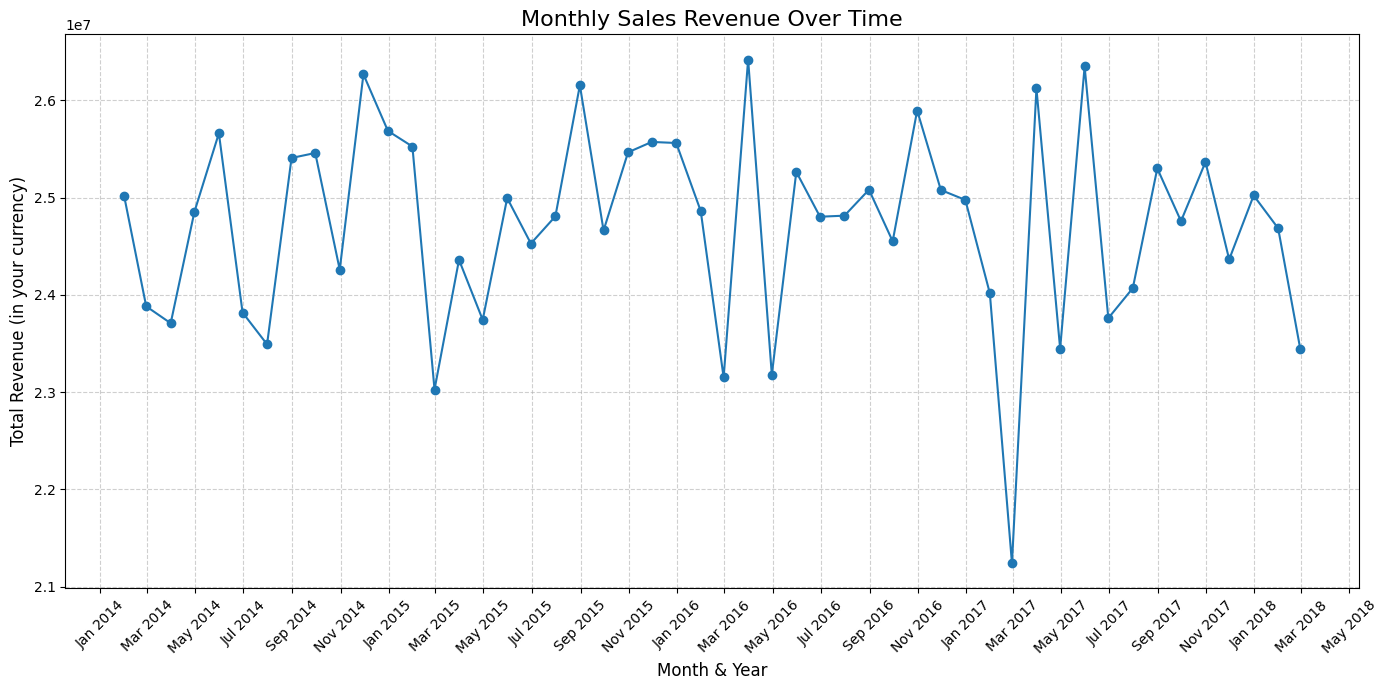

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---------------- Step 1: Data Overview ----------------

# Check the structure of the DataFrame
print("DataFrame Overview:")
print(df.dtypes)
print("\nDate Range:", df['order_date'].min(), "to", df['order_date'].max())

# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Drop rows with invalid or missing dates if any
df = df.dropna(subset=['order_date'])

# ---------------- Step 2: Grouping by Month ----------------

# Group revenue by year and month using pd.Grouper
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M'))['revenue'].sum().reset_index()

# Display the aggregated data (optional)
print("\nMonthly Sales Summary:")
print(monthly_sales.head())

# ---------------- Step 3: Plotting the Line Chart ----------------

plt.figure(figsize=(14, 7))

# Plot with line and markers
plt.plot(monthly_sales['order_date'], monthly_sales['revenue'], marker='o', linestyle='-')

# Title and axis labels
plt.title('Monthly Sales Revenue Over Time', fontsize=16)
plt.xlabel('Month & Year', fontsize=12)
plt.ylabel('Total Revenue (in your currency)', fontsize=12)

# ---------------- Step 4: Formatting the Time Axis ----------------

# Set major x-axis ticks to show every 2nd month for better spacing
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2014

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid for better visual reference
plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout for neatness
plt.tight_layout()

# Show the plot
plt.show()


In [61]:
# Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter out records from 2018-01 and 2018-02
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]



C:\Users\acer\AppData\Local\Temp\ipykernel_12336\3790764185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce')


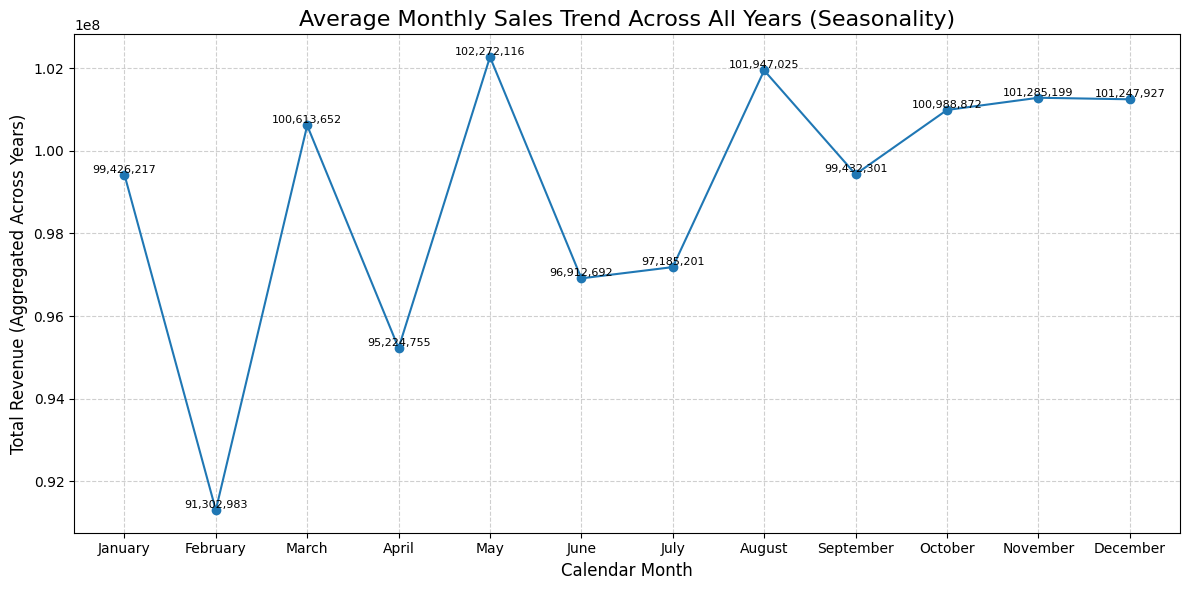

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Step 1: Ensure 'order_date' is in datetime format ----------------
df_new['order_date'] = pd.to_datetime(df_new['order_date'], errors='coerce')
df_new = df_new.dropna(subset=['order_date'])

# ---------------- Step 2: Extract calendar month and group across years ----------------

# Extract month number and month name
df_new['month'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%B')

# Group by month and calculate total or average revenue
monthly_seasonality = df_new.groupby(['month', 'month_name'])['revenue'].sum().reset_index()

# Sort by month number to keep calendar order
monthly_seasonality = monthly_seasonality.sort_values('month')

# ---------------- Step 3: Plotting the Seasonality Chart ----------------

plt.figure(figsize=(12, 6))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o', linestyle='-')

# Titles and labels
plt.title('Average Monthly Sales Trend Across All Years (Seasonality)', fontsize=16)
plt.xlabel('Calendar Month', fontsize=12)
plt.ylabel('Total Revenue (Aggregated Across Years)', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show data points
for i, value in enumerate(monthly_seasonality['revenue']):
    plt.text(i, value, f'{int(value):,}', ha='center', va='bottom', fontsize=8)

# Tight layout and display
plt.tight_layout()
plt.show()


In [63]:
df.to_csv('final.csv')

***2. top 10 Products from the revenue***

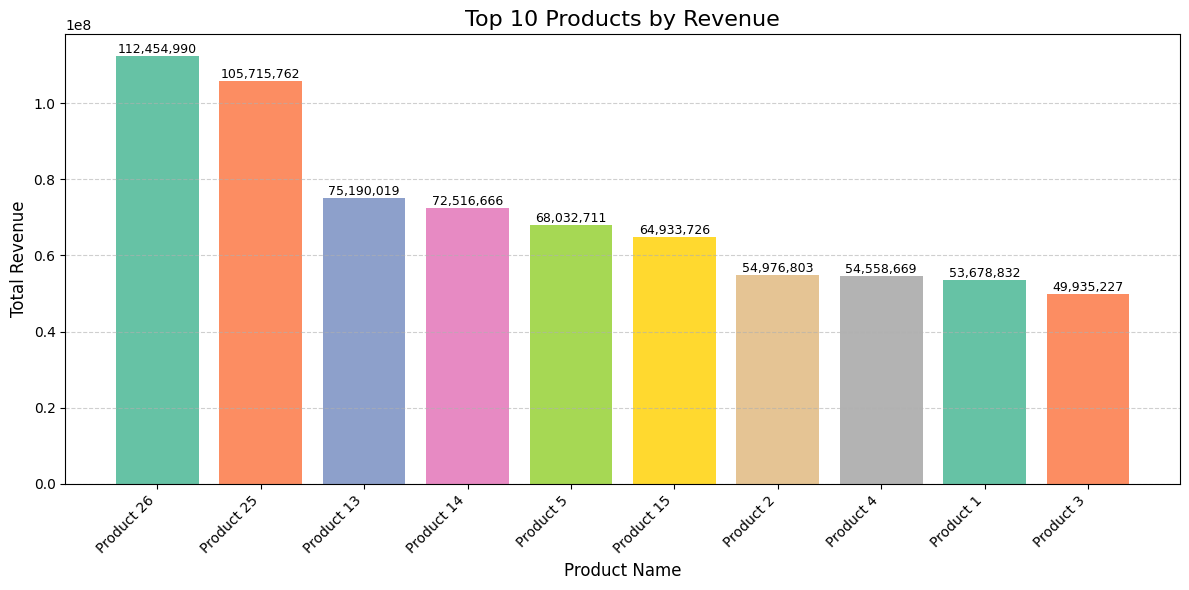

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Step 1: Group by product_name and sum the revenue ----------------
top_products = (
    df_new.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# ---------------- Step 2: Plotting the Bar Chart with Different Colors ----------------

# Set a seaborn color palette with 10 distinct colors
colors = sns.color_palette("Set2", n_colors=10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_products['product_name'], top_products['revenue'], color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=9)

# Title and axis labels
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


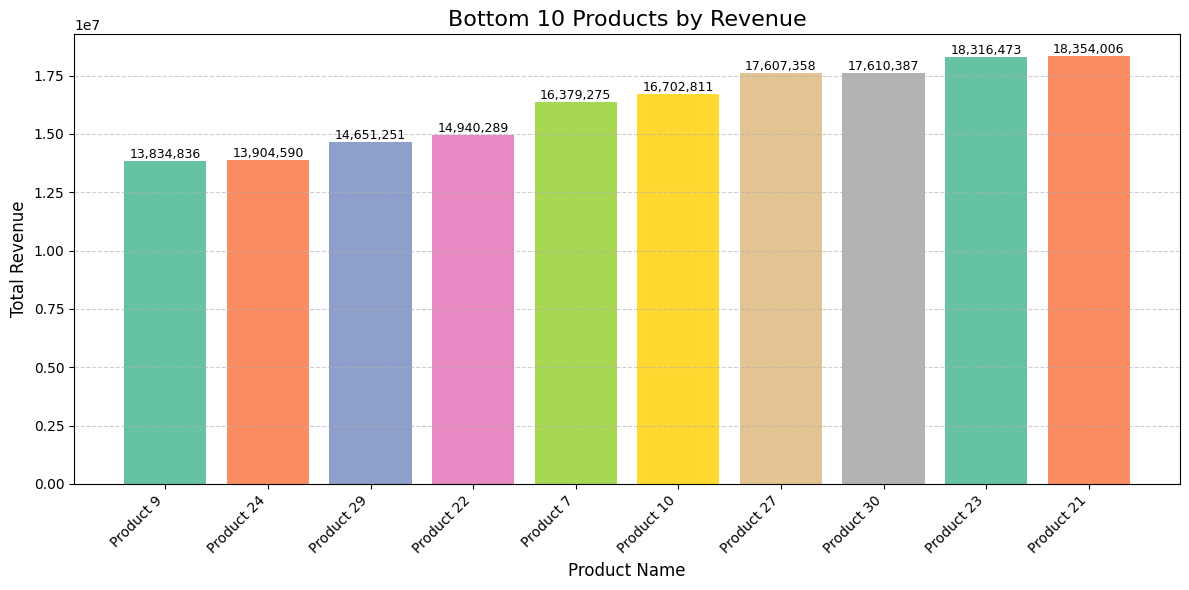

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Step 1: Group by product_name and sum the revenue ----------------
bottom_products = (
    df_new.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=True)  # Bottom 10 by revenue
    .head(10)
    .reset_index()
)

# ---------------- Step 2: Plotting the Bar Chart with Distinct Colors ----------------

# Use Seaborn color palette (distinct 10 colors)
colors = sns.color_palette("Set2", n_colors=10)

plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_products['product_name'], bottom_products['revenue'], color=colors)

# Add value labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}',
             ha='center', va='bottom', fontsize=9)

# Chart title and axis labels
plt.title('Bottom 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Add gridlines on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


# 3. Sales by Channel

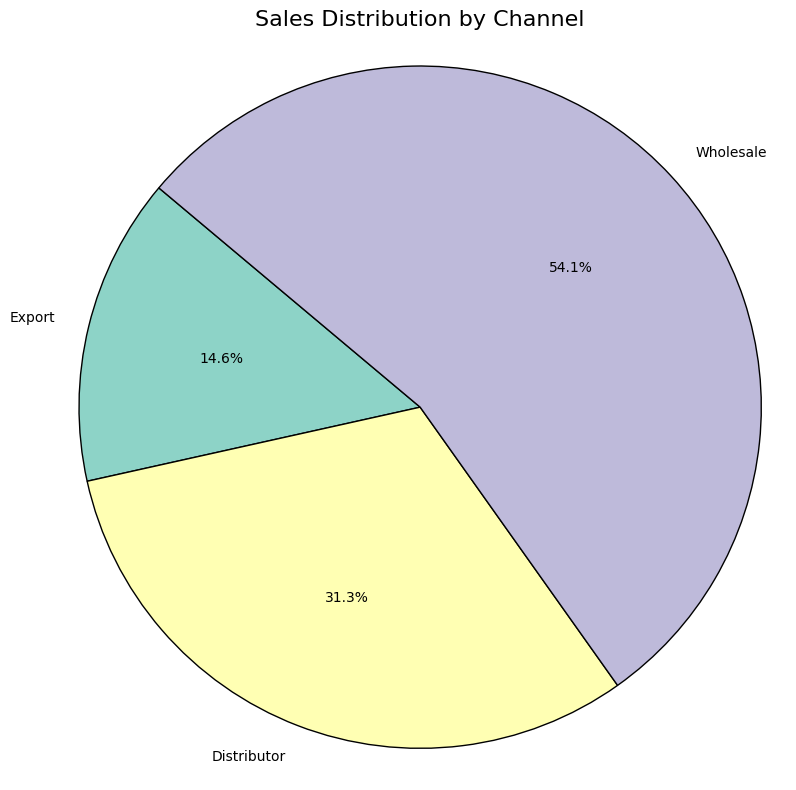

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Step 1: Group by 'channel' and sum the revenue ----------------
channel_sales = df_new.groupby('channel')['revenue'].sum().reset_index()

# Sort by revenue (optional)
channel_sales = channel_sales.sort_values('revenue', ascending=True)

# ---------------- Step 2: Plot the Pie Chart ----------------
plt.figure(figsize=(8, 8))

# Create pie chart
plt.pie(
    channel_sales['revenue'],
    labels=channel_sales['channel'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,  # Colorful and distinct
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title('Sales Distribution by Channel', fontsize=16)

# Equal aspect ratio ensures pie is a circle
plt.axis('equal')

plt.tight_layout()
plt.show()


***4. Average Order Value (AOV) Distributions***

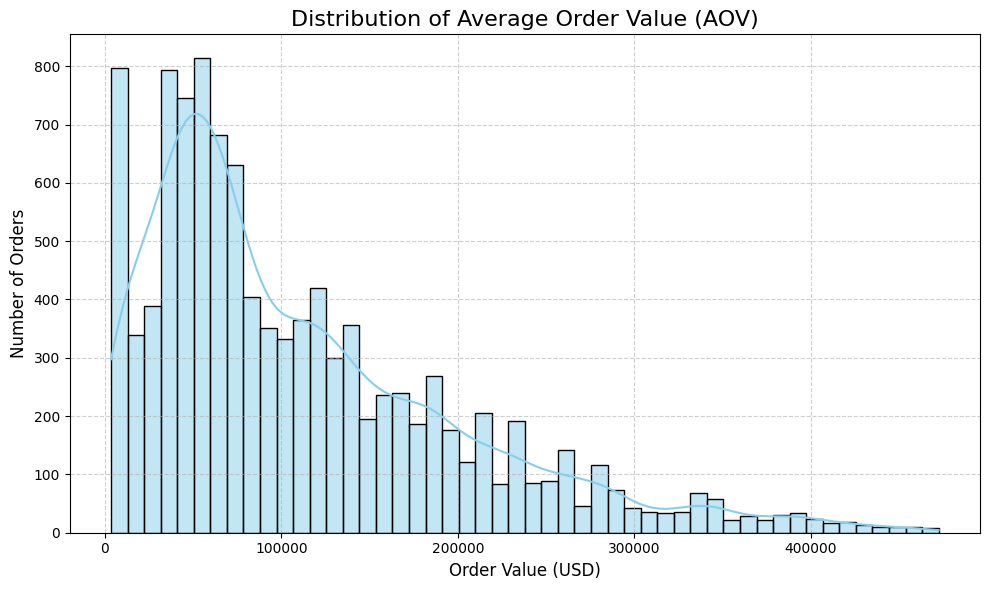

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Step 1: Calculate AOV ----------------
# Group by 'order_number' instead of 'order_id'
aov_df = df_new.groupby('order_number')['revenue'].sum().reset_index()
aov_df.rename(columns={'revenue': 'AOV'}, inplace=True)

# ---------------- Step 2: Plot Distribution of AOV ----------------
plt.figure(figsize=(10, 6))
sns.histplot(aov_df['AOV'], bins=50, kde=True, color='skyblue')

# Titles and labeled axes
plt.title('Distribution of Average Order Value (AOV)', fontsize=16)
plt.xlabel('Order Value (USD)', fontsize=12)  # <-- X-axis label updated here
plt.ylabel('Number of Orders', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


***5. Unit Price Distribution per Product***

C:\Users\acer\AppData\Local\Temp\ipykernel_12336\2613367718.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


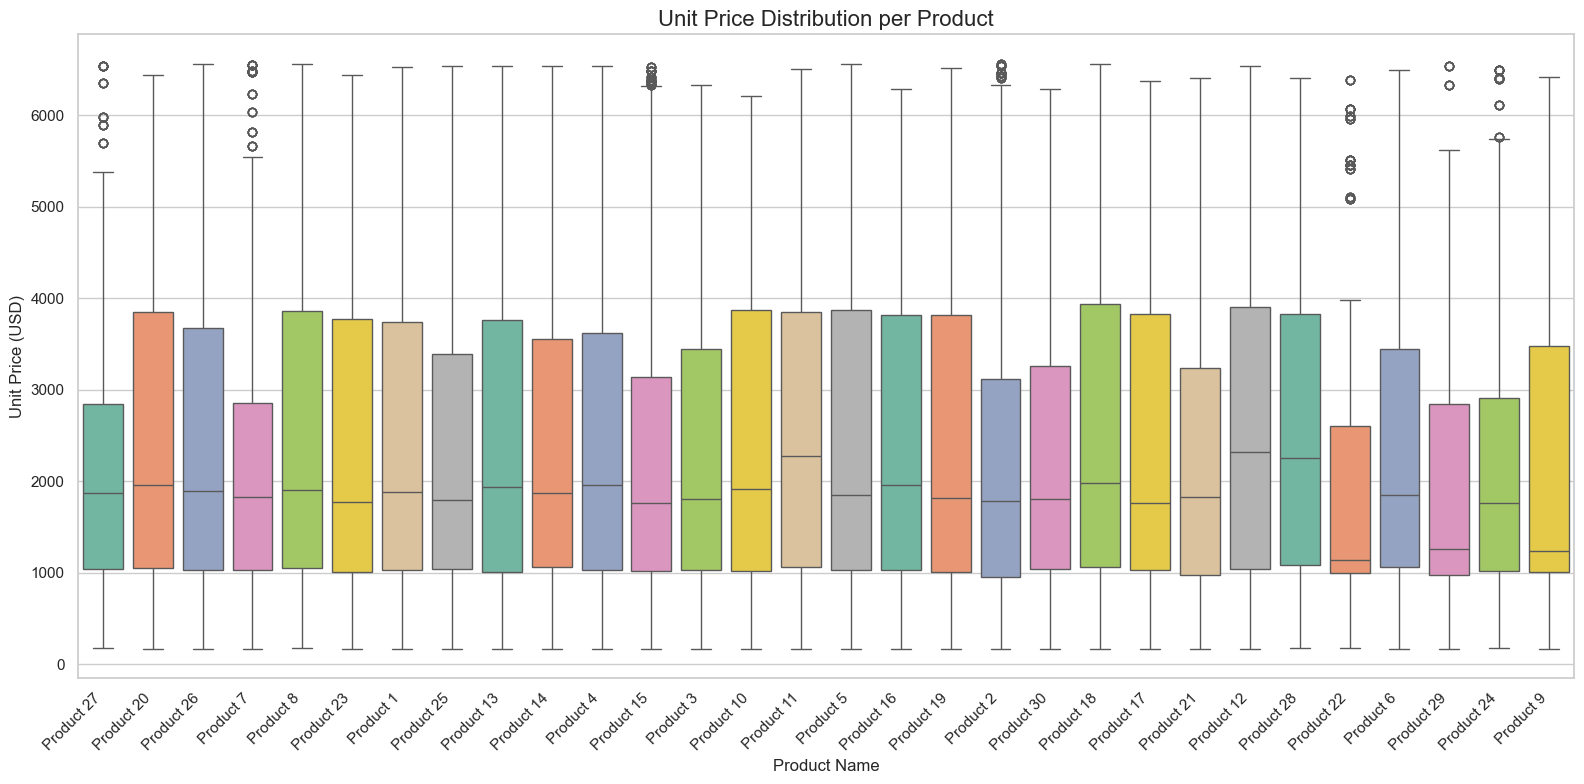

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create box plot (rectangle bars showing distribution)
sns.boxplot(
    data=df_new,
    x='product_name',
    y='unit_price',
    palette='Set2'
)

# Customize the plot
plt.title('Unit Price Distribution per Product', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate product names for readability
plt.tight_layout()
plt.show()


***6. top 10 State by revenue and order count***


C:\Users\acer\AppData\Local\Temp\ipykernel_12336\3892071567.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_revenue.index, y=state_revenue.values, palette="Set2")


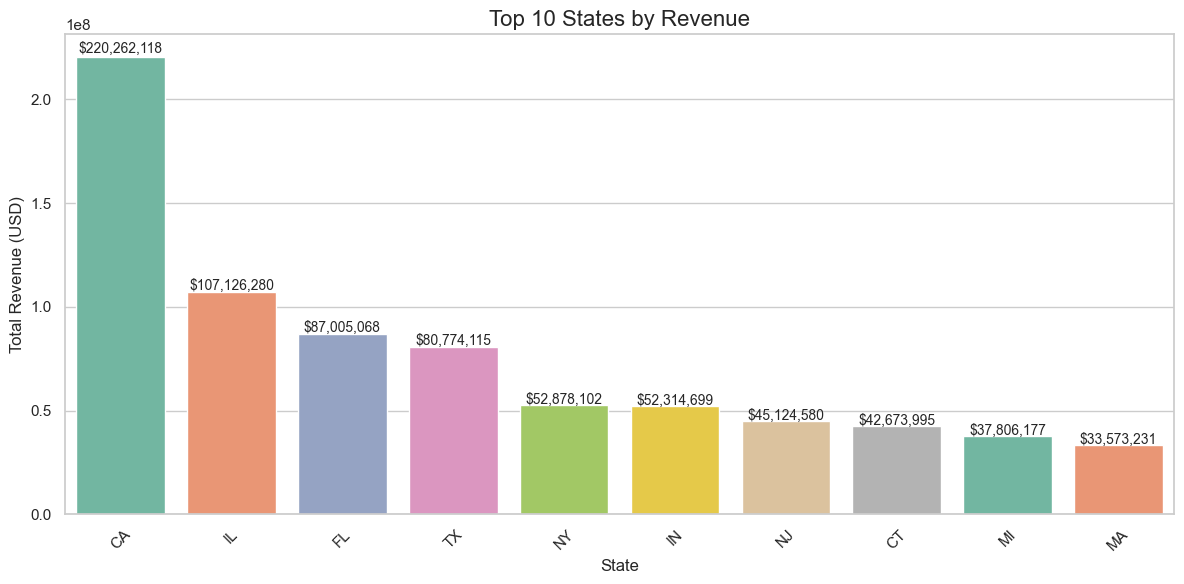

C:\Users\acer\AppData\Local\Temp\ipykernel_12336\3892071567.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_order_count.index, y=state_order_count.values, palette="Set3")


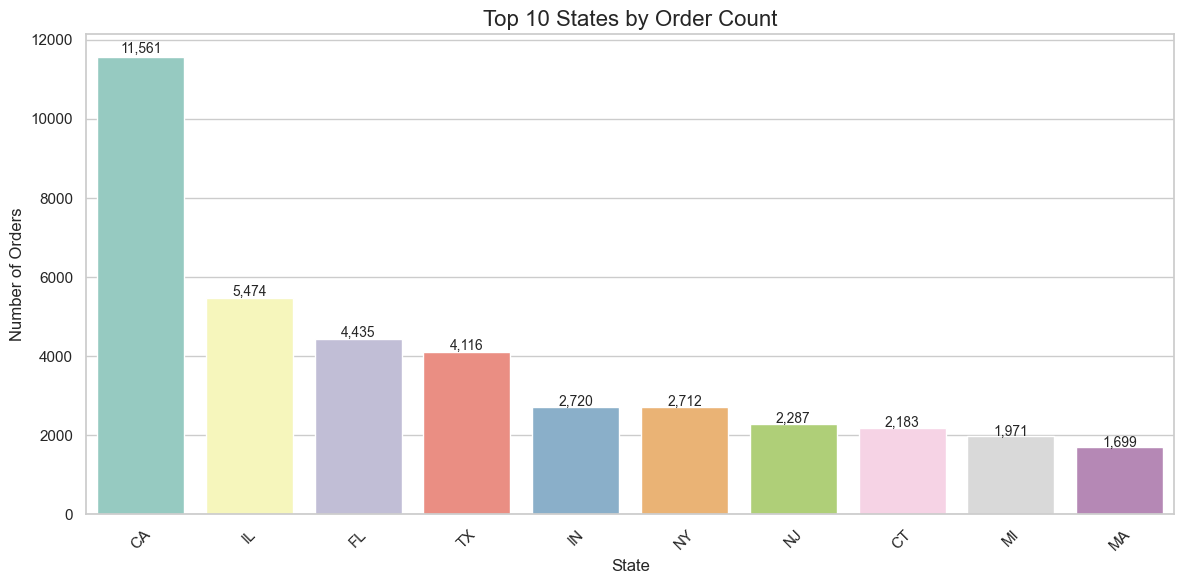

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data
state_revenue = df_new.groupby('state')['revenue'].sum().sort_values(ascending=False).head(10)
state_order_count = df_new.groupby('state')['order_number'].count().sort_values(ascending=False).head(10)

# Set style
sns.set(style="whitegrid")

# --- Plot 1: Top 10 States by Revenue (Vertical) ---
plt.figure(figsize=(12, 6))
sns.barplot(x=state_revenue.index, y=state_revenue.values, palette="Set2")
plt.title("Top 10 States by Revenue", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)

# Add revenue labels on top
for i, value in enumerate(state_revenue.values):
    plt.text(i, value + (0.01 * value), f"${value:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# --- Plot 2: Top 10 States by Order Count (Vertical) ---
plt.figure(figsize=(12, 6))
sns.barplot(x=state_order_count.index, y=state_order_count.values, palette="Set3")
plt.title("Top 10 States by Order Count", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)

# Add order count labels on top
for i, value in enumerate(state_order_count.values):
    plt.text(i, value + (0.01 * value), f"{value:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


***7. Channel wise profit margin***

Average Profit Margin by Channel:
channel
Export         37.94%
Distributor    37.55%
Wholesale      37.11%
Name: profit_margin, dtype: object


C:\Users\acer\AppData\Local\Temp\ipykernel_12336\3765826793.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_margin_by_channel.index, y=avg_margin_by_channel.values, palette='viridis')


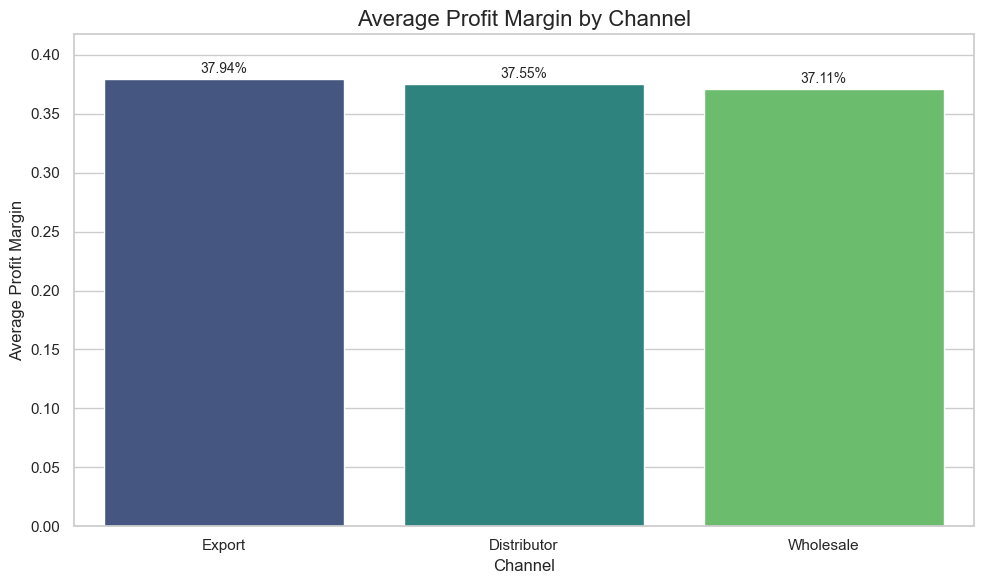

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate profit and profit margin for each order
df_new['profit'] = df_new['revenue'] - df_new['total_cost']
df_new['profit_margin'] = df_new['profit'] / df_new['revenue']

# Step 2: Group by channel and compute average profit margin
avg_margin_by_channel = df_new.groupby('channel')['profit_margin'].mean().sort_values(ascending=False)

# Step 3: Print average profit margin by channel
print("Average Profit Margin by Channel:")
print(avg_margin_by_channel.apply(lambda x: f"{x:.2%}"))

# Step 4: Plot average profit margin by channel as a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_margin_by_channel.index, y=avg_margin_by_channel.values, palette='viridis')

# Title and labels
plt.title("Average Profit Margin by Channel", fontsize=16)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Average Profit Margin", fontsize=12)
plt.ylim(0, avg_margin_by_channel.max() * 1.1)

# Add percentage labels on top of each bar
for i, value in enumerate(avg_margin_by_channel.values):
    plt.text(i, value + 0.005, f"{value:.2%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


***8. Top 10 Customer and Bottom 10 Customer By revenue***

Top 10 Customers by Revenue:
 customer_name
Aibox Company       12161136.5
State Ltd           11851757.3
Pixoboo Corp        10652242.9
Realbuzz Ltd        10420731.1
Organon Corp        10390447.1
WOCKHARDT Group     10231851.4
Kare Corp           10225345.7
Colgate-Pa Group     9852664.9
Deseret Group        9697888.2
Vimbo Company        9569080.7
Name: revenue, dtype: float64

Bottom 10 Customers by Revenue:
 customer_name
Roomm Company    4902711.6
Aldi Ltd         4889385.3
Quaxo Ltd        4818867.8
Zoomdog Corp     4804516.4
SEINDNI Corp     4710100.0
Epic Group       4639877.3
Voonyx Group     4530908.5
Mycone Ltd       4443795.1
Yodoo Ltd        4224048.5
BB17 Company     3904813.6
Name: revenue, dtype: float64


C:\Users\acer\AppData\Local\Temp\ipykernel_12336\2457505033.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers.values, y=top_10_customers.index, palette='Blues_d')


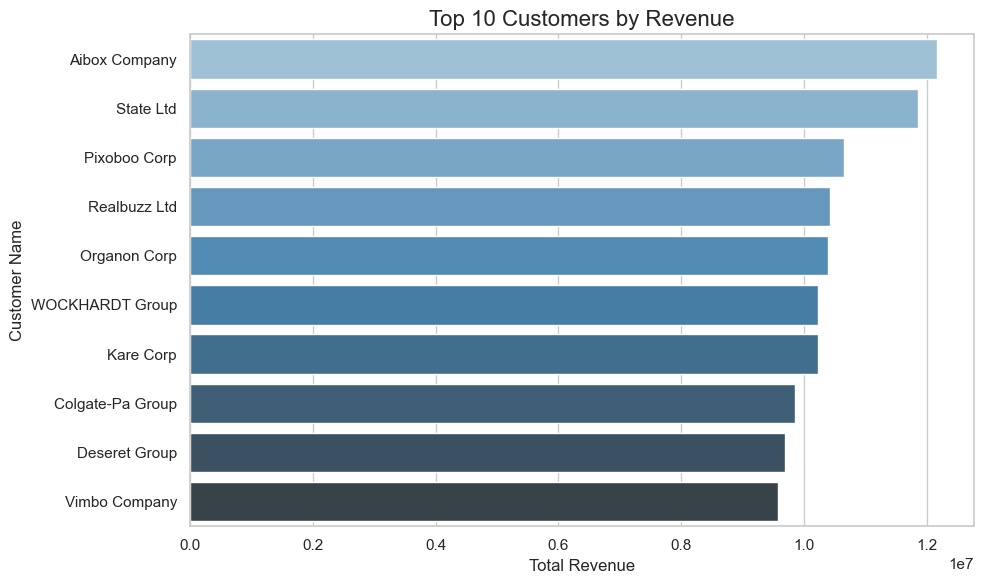

C:\Users\acer\AppData\Local\Temp\ipykernel_12336\2457505033.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_customers_sorted.values, y=bottom_10_customers_sorted.index, palette='Reds_d')


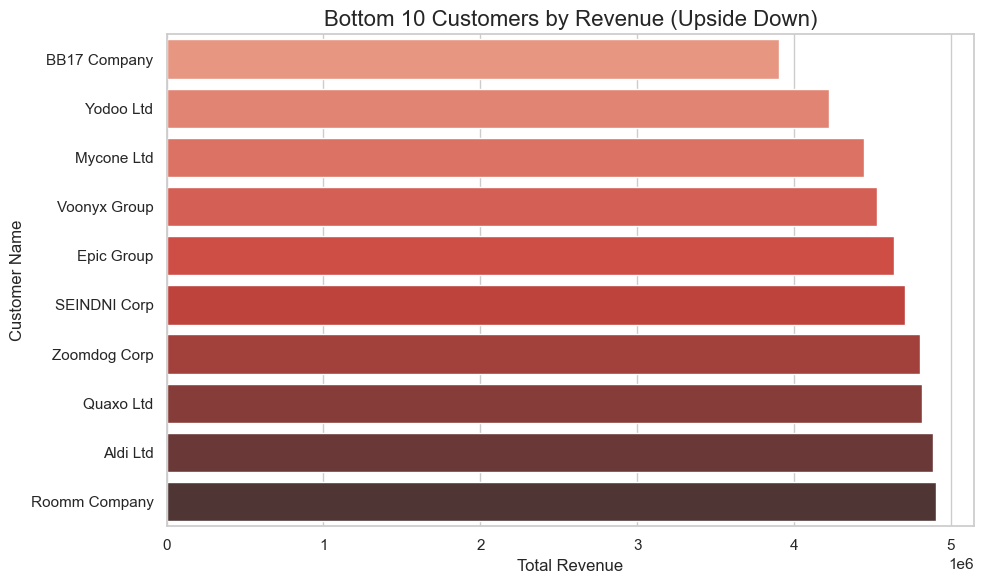

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure revenue is numeric
df_new['revenue'] = pd.to_numeric(df_new['revenue'], errors='coerce')

# Group by customer_name and sum revenue
customer_revenue = df_new.groupby('customer_name')['revenue'].sum().sort_values(ascending=False)

# Top 10 customers by revenue
top_10_customers = customer_revenue.head(10)

# Bottom 10 customers by revenue
bottom_10_customers = customer_revenue.tail(10)

# Print results
print("Top 10 Customers by Revenue:\n", top_10_customers)
print("\nBottom 10 Customers by Revenue:\n", bottom_10_customers)

# Plot Top 10 Customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_customers.values, y=top_10_customers.index, palette='Blues_d')
plt.title("Top 10 Customers by Revenue", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

# Plot Bottom 10 Customers
# Reverse the bottom 10 customers so that the smallest revenue is at the bottom
bottom_10_customers_sorted = bottom_10_customers.sort_values(ascending=True)

# Plot Bottom 10 Customers Upside Down
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_10_customers_sorted.values, y=bottom_10_customers_sorted.index, palette='Reds_d')
plt.title("Bottom 10 Customers by Revenue (Upside Down)", fontsize=16)
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()



***9. Customer Segmentation : Revenue vs Profit Margin***

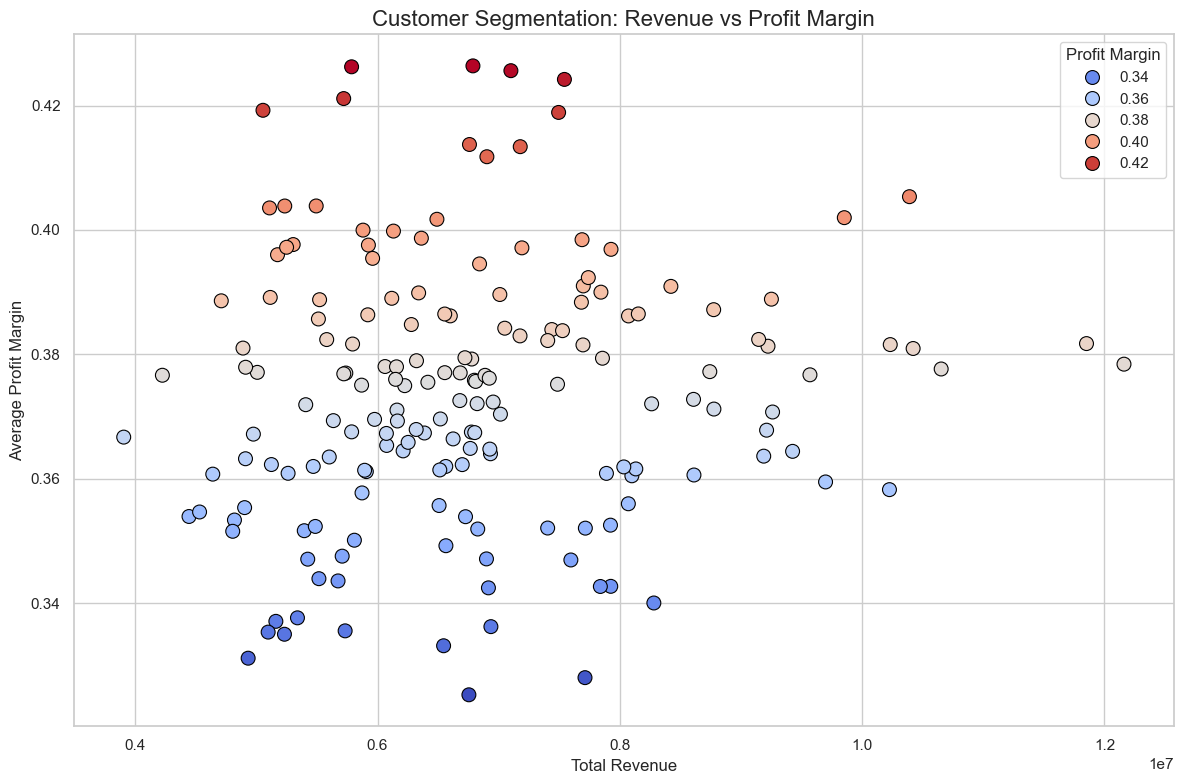

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer and calculate total revenue and average profit margin
customer_segment = df_new.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin': 'mean'
}).reset_index()

# Set the plot size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Scatter plot for Revenue vs Profit Margin
sns.scatterplot(
    data=customer_segment,
    x='revenue',
    y='profit_margin',
    hue='profit_margin',  # Optional: color by profit margin for better gradient view
    palette='coolwarm',
    s=100,
    edgecolor='black'
)

# Add labels and title
plt.title("Customer Segmentation: Revenue vs Profit Margin", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Average Profit Margin", fontsize=12)
plt.legend(title='Profit Margin', loc='upper right')

# Improve layout
plt.tight_layout()
plt.show()


***10. Corelation Heatmap***

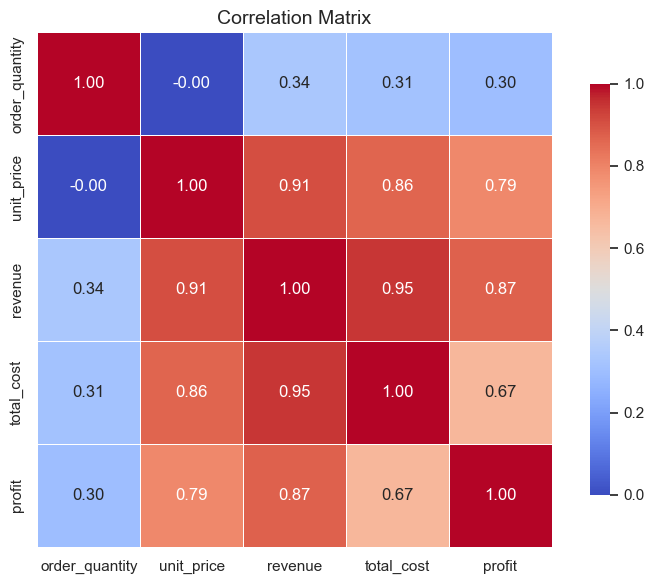

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant columns for correlation analysis
corr_df = df[["order_quantity", "unit_price", "revenue", "total_cost", "profit"]]

# Compute correlation matrix
correlation_matrix = corr_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()
